In [1]:
import pandas as pd
import matplotlib as plt
import sklearn as sk
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
raw_df = pd.read_excel("data_stuff.xlsx")
df = raw_df.copy()


In [3]:
df["event_date"] = pd.to_datetime(df["event_date"])
df.describe()


,record_id,athlete_id,event_date,n_runners,finish_time,position,athlete_age,best_time,worst_time,mean_time,median_time,times,num_locations,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,rain.1h,snow.1h
count,74984.000000,7.498400e+04,74984,74984.000000,74984.000000,74984.000000,74984.000000,74984.000000,74984.000000,74984.000000,74984.000000,74984.000000,74984.000000,74984.000000,74984.000000,74984.000000,74984.000000,74984.000000,74984.000000,74984.000000,74984.000000,7304.000000,3014.000000
mean,10099.839966,7.901349e+08,2023-08-14 15:40:00.128027392,70.455471,1829.055465,43.293143,34.882948,1734.720514,1988.356223,1834.234714,1819.428625,5.021044,1.196669,9.420246,7.536818,1014.023232,76.149178,5.008441,53.546690,3.653989,181.822655,0.569651,0.289711
min,4752.000000,7.900555e+08,2023-01-01 00:00:00,1.000000,940.000000,1.000000,4.000000,940.000000,940.000000,940.000000,940.000000,1.000000,1.000000,-46.540000,-46.540000,974.000000,17.000000,-51.000000,0.000000,0.000000,0.000000,0.100000,0.100000
25%,8426.000000,7.901295e+08,2023-06-17 00:00:00,26.000000,1528.000000,11.000000,29.000000,1455.000000,1647.000000,1554.247500,1535.500000,1.000000,1.000000,1.880000,-2.020000,1009.000000,65.000000,-0.820000,1.000000,2.080000,90.000000,0.170000,0.170000
50%,10211.000000,7.901369e+08,2023-08-26 00:00:00,42.000000,1760.000000,23.000000,36.000000,1668.000000,1912.000000,1776.000000,1758.000000,3.000000,1.000000,11.190000,10.330000,1015.000000,80.000000,6.420000,67.000000,3.580000,190.000000,0.360000,0.250000
75%,11861.000000,7.901463e+08,2023-10-21 00:00:00,71.000000,2040.000000,45.000000,42.000000,1932.000000,2242.000000,2039.500000,2024.500000,7.000000,1.000000,17.710000,17.350000,1021.000000,91.000000,12.220000,100.000000,5.000000,271.000000,0.800000,0.340000
max,15204.000000,7.901652e+08,2023-12-30 00:00:00,646.000000,71391.000000,800.000000,122.000000,71391.000000,71391.000000,71391.000000,71391.000000,46.000000,29.000000,34.990000,40.270000,1051.000000,100.000000,24.220000,100.000000,13.000000,360.000000,3.670000,2.380000
std,2187.049652,1.843392e+04,NaN,92.277016,501.500997,70.438813,12.581883,473.307464,549.941909,480.034406,483.473700,5.339472,0.874465,10.452972,12.231493,10.134969,17.203368,9.286231,42.044363,1.833336,107.722101,0.566427,0.202439


In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
df["home"].value_counts()

home
Затюменский                               6065
Магнитогорск Экопарк                      2837
Пестовский                                1551
Солнечный остров                          1545
Ростов-на-Дону                            1474
Тобольск                                  1411
Новосибирск набережная                    1319
Набережная Реки Великой                   1247
Белгород Парк Победы                      1181
Ставрополь                                1169
Московский парк Победы                    1127
Плотинка                                  1126
Сосновка                                  1072
Петергоф Александрийский                  1053
Пятигорск Комсомольский парк              1017
Парк 850-летия Москвы                      981
Зеленоград                                 965
Пермь Балатово                             952
Воронеж Центральный парк                   952
Парк Лесоводов                             949
Иркутск остров Юность                      921
Тамбов  

In [5]:
def genderfunc(gdr):
    if gdr == "мужской":
        return 0
    return 1
df["gender_num"] = df.apply(lambda x: genderfunc(x["athlete_gender"]), axis=1)


In [6]:
df[df.athlete_id == 790134352]["num_locations"]

30822    1
30823    1
30824    1
30825    1
30826    2
30827    2
30828    2
30829    3
30830    4
30831    4
30832    4
30833    4
30834    4
30835    4
30836    4
30837    4
30838    4
30839    4
30840    4
30841    4
30842    4
30843    4
30844    4
Name: num_locations, dtype: int64

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
lrg1 = LinearRegression()

ls_id = df["athlete_id"].to_list()
std_devs = dict()
times = dict()
ages = dict()
n_runn_avg = dict()
genders = dict()
coeffs = dict()
scores = dict()
diff_surf = dict()
diff_park = dict()
avg_flike = dict()
avg_ws = dict()
avg_hpa = dict()
avg_humid = dict()
avg_dew = dict()

min_n = 5
t_ls_t = []

for i in ls_id:
    tmp_ft = df[df.athlete_id == i]
    t_ls_t.append(tmp_ft["finish_time"].max())
    if len(tmp_ft["finish_time"]) >= min_n:
        std_devs[i] = tmp_ft["finish_time"].std()
        times[i] = tmp_ft["finish_time"].min()
        ages[i] = tmp_ft["athlete_age"].mean()
        n_runn_avg[i] = tmp_ft["n_runners"].mean()
        genders[i] = tmp_ft["gender_num"].mean()

        times_train = np.array(df[df.athlete_id == i]["times"])
        ft_train = np.array(df[df.athlete_id == i]["finish_time"])
        lrg1.fit(times_train[:, np.newaxis], ft_train[:, np.newaxis])
        sc = lrg1.score(times_train[:, np.newaxis], ft_train[:, np.newaxis])
        coeffs[i] = lrg1.coef_[0][0]
        scores[i] = sc
        surfs = set(tmp_ft["track_description_surface"])
        diff_surf[i] = len(surfs)
        diff_park[i] = max(tmp_ft["num_locations"])
        avg_flike[i] = tmp_ft["feels_like"].mean()
        avg_ws[i] = tmp_ft["wind_speed"].mean()
        avg_hpa[i] = tmp_ft["pressure"].mean()
        avg_humid[i] = tmp_ft["humidity"].mean()
        avg_dew[i] = tmp_ft["dew_point"].mean()


In [8]:
ids_srt = []
std_devs_twk = []
t_mod = []
age_twk = []
n_runn_twk = []
gen_twk = []
lr_twk = []
scr_twk = []
ds_twk = []
dp_twk = []
avg_fl_twk = []
avg_ws_twk = []
avg_dew_twk = []
avg_hpa_twk = []
avg_humid_twk = []
sc_min = 0.3
for i in std_devs:
    if(scores[i] >= sc_min):
        ids_srt.append(i)
        t_mod.append(times[i])
        std_devs_twk.append(std_devs[i])
        age_twk.append(ages[i])
        n_runn_twk.append(n_runn_avg[i])
        gen_twk.append(genders[i])
        lr_twk.append(-1*coeffs[i])
        scr_twk.append(scores[i])
        ds_twk.append(diff_surf[i])
        dp_twk.append(diff_park[i])
        avg_fl_twk.append(avg_flike[i])
        avg_ws_twk.append(avg_ws[i])
        avg_hpa_twk.append(avg_hpa[i])
        avg_humid_twk.append(avg_humid[i])
        avg_dew_twk.append(avg_dew[i])
data_dict = {'athlete_id': pd.Series(ids_srt), 'std_dev': pd.Series(std_devs_twk), 'time': t_mod, 'age': pd.Series(age_twk),
             'gender': pd.Series(gen_twk), "n_runn_avg": n_runn_twk , "diff_surf": ds_twk, "diff_park": dp_twk,
             "feels_like_c": avg_fl_twk, "ws_avg": avg_ws_twk, "pressure": avg_hpa_twk, "humidity": avg_humid_twk, 
             "dew_point": avg_dew_twk, "linreg": lr_twk}

tdf = pd.DataFrame(data_dict)
tdf

,athlete_id,std_dev,time,age,gender,n_runn_avg,diff_surf,diff_park,feels_like_c,ws_avg,pressure,humidity,dew_point,linreg
0,790055996,157.518858,1388,40.857143,1.0,66.809524,1,1,1.773810,4.199524,1009.619048,77.142857,0.824762,15.576623
1,790056046,532.781631,1775,35.000000,1.0,28.666667,3,4,9.003333,3.571667,1019.000000,83.333333,7.901667,-189.257143
2,790056690,41.142436,1825,42.000000,1.0,79.200000,1,1,5.476000,4.800000,1011.200000,80.400000,4.774000,-16.200000
3,790056805,102.875011,1734,59.500000,0.0,70.250000,1,1,6.978750,4.625000,1007.875000,75.750000,5.041250,-26.821429
4,790056835,54.838855,1167,47.000000,0.0,29.600000,1,2,-1.240000,4.862000,1015.200000,87.400000,0.728000,-31.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,790158469,81.432180,1555,61.000000,0.0,63.800000,1,1,-9.834000,2.690000,1006.000000,91.000000,-7.118000,39.900000
1626,790158592,90.809141,1563,37.000000,0.0,34.000000,2,2,-8.804000,2.804000,1006.600000,89.800000,-6.452000,-37.800000
1627,790158732,76.887580,1487,41.000000,1.0,50.200000,1,1,-9.858000,4.710000,1021.400000,84.200000,-6.692000,29.200000
1628,790159322,246.674482,2183,46.000000,1.0,20.400000,1,1,-11.264000,4.268000,1004.200000,90.600000,-6.992000,94.300000


In [9]:
pds = pd.Series(t_ls_t)
pds.describe()

count    74984.000000
mean      2085.457698
std        575.937008
min        940.000000
25%       1727.000000
50%       2004.000000
75%       2359.000000
max      71391.000000
dtype: float64

In [10]:
len(std_devs)

4595

<Axes: >

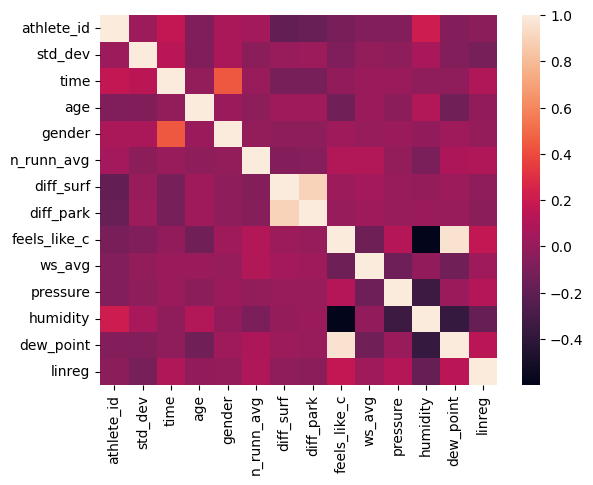

In [11]:
sns.heatmap(tdf.corr())

In [12]:
tdf.corr()

,athlete_id,std_dev,time,age,gender,n_runn_avg,diff_surf,diff_park,feels_like_c,ws_avg,pressure,humidity,dew_point,linreg
athlete_id,1.000000,0.022796,0.168239,-0.085789,0.081962,0.049164,-0.187397,-0.172520,-0.111141,-0.073238,-0.071402,0.209641,-0.065539,-0.031224
std_dev,0.022796,1.000000,0.137352,-0.079718,0.076616,-0.038797,0.009808,0.024375,-0.080084,-0.011221,-0.024246,0.065529,-0.072272,-0.112444
time,0.168239,0.137352,1.000000,-0.009940,0.444063,0.007973,-0.111232,-0.113132,-0.016552,0.015913,0.019898,-0.018956,-0.023661,0.089402
age,-0.085789,-0.079718,-0.009940,1.000000,0.017640,-0.026739,0.037902,0.027673,-0.139101,0.018371,-0.041099,0.102414,-0.130484,-0.011346
gender,0.081962,0.076616,0.444063,0.017640,1.000000,-0.007035,-0.025485,-0.029994,0.027046,0.002629,0.017233,-0.012969,0.029202,-0.004793
n_runn_avg,0.049164,-0.038797,0.007973,-0.026739,-0.007035,1.000000,-0.065505,-0.059779,0.102047,0.107093,-0.006311,-0.101819,0.085808,0.099561
diff_surf,-0.187397,0.009808,-0.111232,0.037902,-0.025485,-0.065505,1.000000,0.897822,0.020448,0.048980,0.012863,-0.000131,0.025235,-0.022880
diff_park,-0.172520,0.024375,-0.113132,0.027673,-0.029994,-0.059779,0.897822,1.000000,0.002549,0.037067,0.007925,0.018615,0.009948,-0.043566
feels_like_c,-0.111141,-0.080084,-0.016552,-0.139101,0.027046,0.102047,0.020448,0.002549,1.000000,-0.148710,0.109440,-0.598070,0.962472,0.164843
ws_avg,-0.073238,-0.011221,0.015913,0.018371,0.002629,0.107093,0.048980,0.037067,-0.148710,1.000000,-0.143469,-0.013954,-0.140579,0.027727


<Axes: >

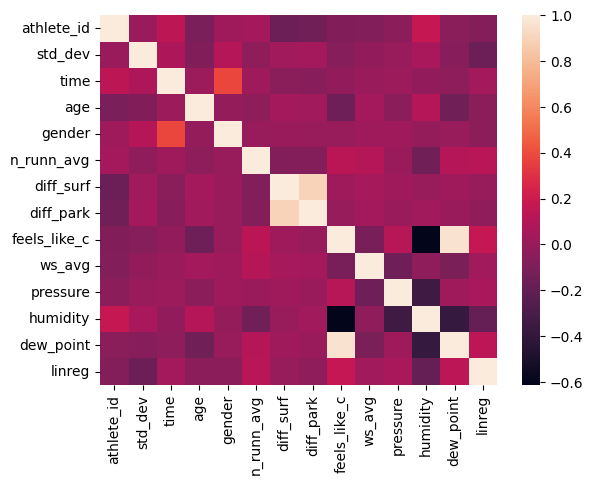

In [13]:
pros = tdf[tdf.time < 1750]
sns.heatmap(pros.corr())

<Axes: >

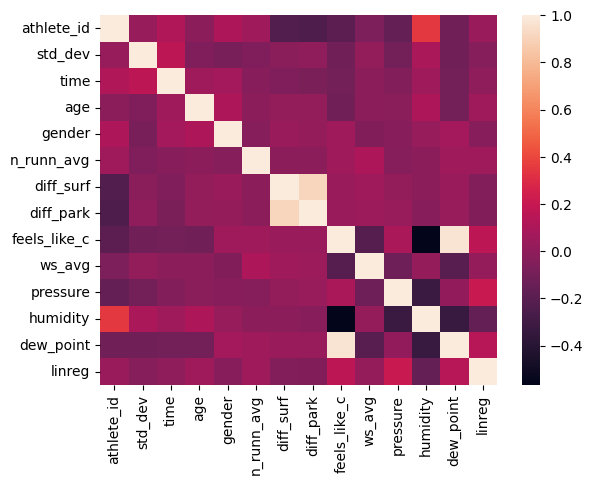

In [14]:
not_pros = tdf[tdf.time >= 1750]
sns.heatmap(not_pros.corr())

In [15]:
pros.corr()

,athlete_id,std_dev,time,age,gender,n_runn_avg,diff_surf,diff_park,feels_like_c,ws_avg,pressure,humidity,dew_point,linreg
athlete_id,1.000000,0.007969,0.138660,-0.114799,0.018751,0.047017,-0.165704,-0.145160,-0.089361,-0.082033,-0.047840,0.170197,-0.054996,-0.075764
std_dev,0.007969,1.000000,0.074624,-0.087472,0.100318,-0.029068,0.031478,0.042391,-0.067957,-0.024995,0.004316,0.056682,-0.060108,-0.165998
time,0.138660,0.074624,1.000000,0.012248,0.380941,0.027174,-0.056072,-0.063179,-0.022168,0.010405,0.011231,-0.025396,-0.034339,0.046316
age,-0.114799,-0.087472,0.012248,1.000000,-0.008131,-0.034688,0.046349,0.031501,-0.154774,0.038896,-0.048385,0.103183,-0.148895,-0.048875
gender,0.018751,0.100318,0.380941,-0.008131,1.000000,0.002600,0.007195,0.003382,0.004134,0.020702,0.018604,-0.013063,0.001926,-0.049973
n_runn_avg,0.047017,-0.029068,0.027174,-0.034688,0.002600,1.000000,-0.080404,-0.072292,0.128017,0.110245,0.008114,-0.143179,0.101913,0.123658
diff_surf,-0.165704,0.031478,-0.056072,0.046349,0.007195,-0.080404,1.000000,0.893974,0.019502,0.054735,0.017836,0.002535,0.025023,-0.002353
diff_park,-0.145160,0.042391,-0.063179,0.031501,0.003382,-0.072292,0.893974,1.000000,-0.004333,0.038518,0.005099,0.030779,0.005637,-0.029582
feels_like_c,-0.089361,-0.067957,-0.022168,-0.154774,0.004134,0.128017,0.019502,-0.004333,1.000000,-0.115382,0.113362,-0.612860,0.962067,0.164543
ws_avg,-0.082033,-0.024995,0.010405,0.038896,0.020702,0.110245,0.054735,0.038518,-0.115382,1.000000,-0.155751,-0.029852,-0.107144,0.030002


In [16]:

not_pros.corr()

,athlete_id,std_dev,time,age,gender,n_runn_avg,diff_surf,diff_park,feels_like_c,ws_avg,pressure,humidity,dew_point,linreg
athlete_id,1.000000,0.025445,0.106959,-0.019529,0.103473,0.055444,-0.230446,-0.242711,-0.189999,-0.064836,-0.159427,0.348535,-0.108175,0.035506
std_dev,0.025445,1.000000,0.164949,-0.060718,-0.084603,-0.064431,-0.023868,0.002463,-0.116510,0.012253,-0.102092,0.096543,-0.107578,-0.035811
time,0.106959,0.164949,1.000000,0.051890,0.066750,-0.027937,-0.060913,-0.073956,-0.103783,-0.014646,-0.052108,0.056689,-0.105142,0.000372
age,-0.019529,-0.060718,0.051890,1.000000,0.105004,-0.013757,0.010981,0.010566,-0.114953,-0.010186,-0.026812,0.100683,-0.102020,0.049359
gender,0.103473,-0.084603,0.066750,0.105004,1.000000,-0.037617,0.034184,0.018411,0.054624,-0.057459,-0.028349,0.022709,0.069931,-0.033162
n_runn_avg,0.055444,-0.064431,-0.027937,-0.013757,-0.037617,1.000000,-0.020002,-0.021143,0.046003,0.100894,-0.037805,-0.012922,0.051206,0.055309
diff_surf,-0.230446,-0.023868,-0.060913,0.010981,0.034184,-0.020002,1.000000,0.910968,0.034418,0.045683,0.013707,-0.021212,0.036118,-0.046520
diff_park,-0.242711,0.002463,-0.073956,0.010566,0.018411,-0.021143,0.910968,1.000000,0.033908,0.044970,0.032657,-0.031035,0.032432,-0.054342
feels_like_c,-0.189999,-0.116510,-0.103783,-0.114953,0.054624,0.046003,0.034418,0.033908,1.000000,-0.215309,0.099081,-0.566329,0.963295,0.162846
ws_avg,-0.064836,0.012253,-0.014646,-0.010186,-0.057459,0.100894,0.045683,0.044970,-0.215309,1.000000,-0.122520,0.018617,-0.206663,0.019133


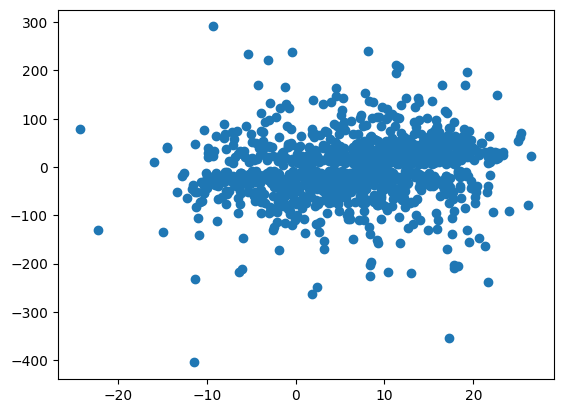

In [17]:
tgt_x = np.array(pros["feels_like_c"]).reshape(-1, 1) 
tgt_y = np.array(pros["linreg"]).reshape(-1, 1) 
plt.pyplot.scatter(tgt_x, tgt_y)

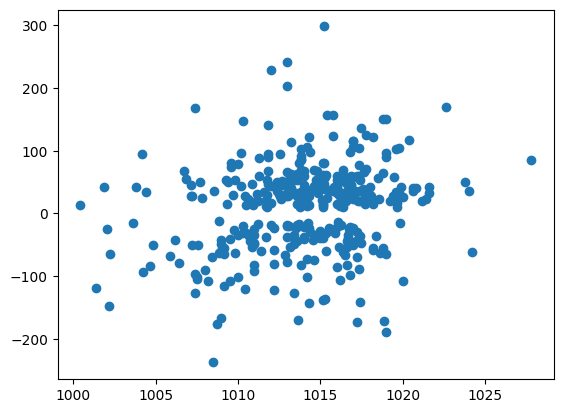

In [18]:
l = 0
r = 80
tmp_618 = not_pros[(not_pros.age > l) & (not_pros.age < r) & (not_pros.gender == 1)]
tgt_x = np.array(tmp_618["pressure"]).reshape(-1, 1) 
tgt_y = np.array(tmp_618["linreg"]).reshape(-1, 1) 
plt.pyplot.scatter(tgt_x, tgt_y)

In [103]:
def plot_mult_gr(ys, x_c, ylim, x_label, y_label, title):
    x = np.arange(len(x_c))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.pyplot.subplots(layout='constrained')

    for attribute, measurement in ys.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=len(x_c))
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_xticks(x + width, x_c)
    ax.legend(loc='upper left', ncols=len(x_c))
    ax.set_ylim(0, ylim)

83.2 -15-5
76.125 5-10
73.4 10-15
70.9090909090909 15-25
{'Профессионалы': [0.9456521739130435, 1.8484848484848484, 2.3783783783783785, 3.7083333333333335], 'Любители': [0.5321428571428571, 0.9814814814814815, 2.4, 2.4029850746268657]} ['-15-5', '5-10', '10-15', '15-25']


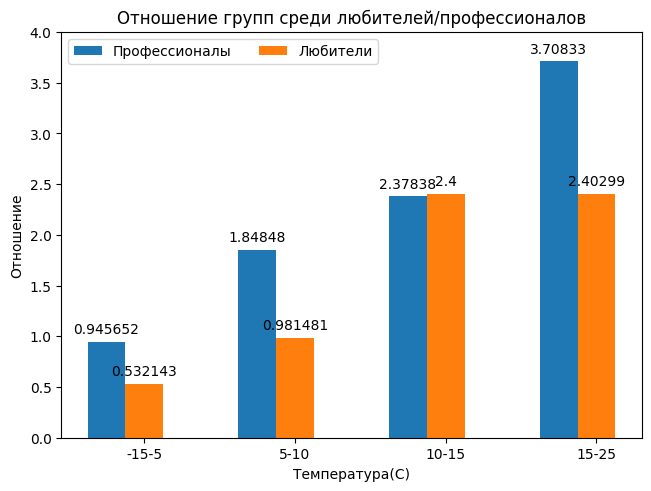

In [105]:
import scipy.stats as stats
temp_mrgns = [(-15, 5), (5, 10), (10, 15), (15, 25)]
temp_names = []
datas = {"Профессионалы": [], "Любители": []}

for i in temp_mrgns:
    temp_names.append(str(i[0])+"-"+str(i[1]))
    curr_imp = not_pros[(not_pros.feels_like_c >= i[0]) & (not_pros.feels_like_c < i[1]) & \
        (not_pros.linreg > 0)]
    curr_nimp = not_pros[(not_pros.feels_like_c >= i[0]) & (not_pros.feels_like_c < i[1]) & \
        (not_pros.linreg < 0)]
    curr_imp_p = pros[(pros.feels_like_c >= i[0]) & (pros.feels_like_c < i[1]) & \
        (pros.linreg > 0)]
    curr_nimp_p = pros[(pros.feels_like_c >= i[0]) & (pros.feels_like_c < i[1]) & \
        (pros.linreg < 0)]
    
    print(curr_imp["humidity"].median(), temp_names[-1])
    datas["Профессионалы"].append((len(curr_imp["linreg"])/len(curr_nimp["linreg"])))
    datas["Любители"].append((len(curr_imp_p["linreg"])/len(curr_nimp_p["linreg"])))
print(datas, temp_names)
plot_mult_gr(datas, temp_names, 4, "Температура(C)", "Отношение", "Отношение групп среди любителей/профессионалов")
plt.pyplot.show()

80.57142857142857 -15-5
76.27622377622379 5-10
73.42857142857143 10-15
69.88888888888889 15-25


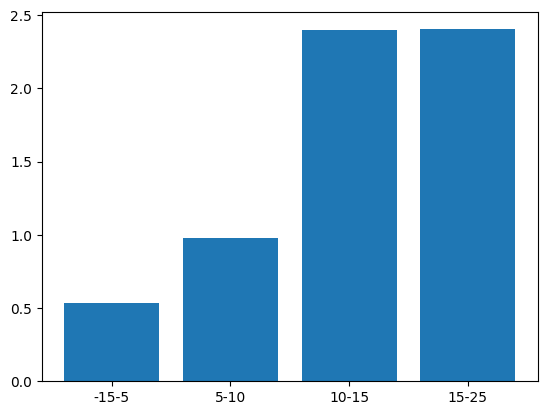

In [36]:
temp_mrgns = [(-15, 5), (5, 10), (10, 15), (15, 25)]
temp_names = []
datas = []

for i in temp_mrgns:
    temp_names.append(str(i[0])+"-"+str(i[1]))
    curr_imp = pros[(pros.feels_like_c >= i[0]) & (pros.feels_like_c < i[1]) & \
        (pros.linreg > 0)]
    curr_nimp = pros[(pros.feels_like_c >= i[0]) & (pros.feels_like_c < i[1]) & \
        (pros.linreg < 0)]
    print(curr_imp["humidity"].median(), temp_names[-1])
    datas.append((len(curr_imp["linreg"])/len(curr_nimp["linreg"])))
bp = plt.pyplot.bar(temp_names, datas)

76 12.832777777777778 18.90125
209 11.846 26.126666666666665
222 10.031428571428572 23.387999999999998


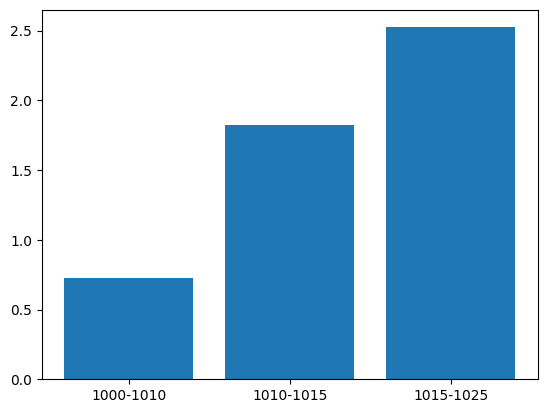

In [21]:
temp_mrgns = [(1000, 1010, -15, 10), (1010, 1015, 10, 15), (1015, 1025, 15, 25)]
temp_names = []
datas = []

for i in temp_mrgns:
    temp_names.append(str(i[0])+"-"+str(i[1]))
    curr_imp = not_pros[(not_pros.pressure >= i[0]) & (not_pros.pressure < i[1]) & \
        (not_pros.linreg > 0)]
    curr_nimp = not_pros[(not_pros.pressure >= i[0]) & (not_pros.pressure < i[1]) & \
        (not_pros.linreg < 0)]
    datas.append((len(curr_imp["linreg"])/len(curr_nimp["linreg"])))
    print(len(curr_imp["linreg"])+len(curr_nimp["linreg"]), curr_imp["feels_like_c"].median(), curr_imp["feels_like_c"].max())
bp = plt.pyplot.bar(temp_names, datas)

181
480
443


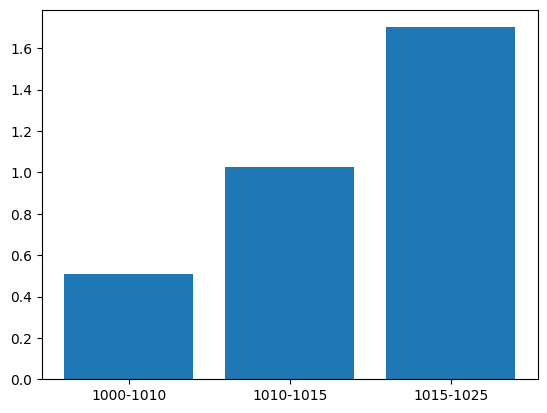

In [22]:
temp_mrgns = [(1000, 1010), (1010, 1015), (1015, 1025)]
temp_names = []
datas = []

for i in temp_mrgns:
    temp_names.append(str(i[0])+"-"+str(i[1]))
    curr_imp = pros[(pros.pressure >= i[0]) & (pros.pressure < i[1]) & \
        (pros.linreg > 0)]
    curr_nimp = pros[(pros.pressure >= i[0]) & (pros.pressure < i[1]) & \
        (pros.linreg < 0)]
    datas.append((len(curr_imp["linreg"])/len(curr_nimp["linreg"])))
    print(len(curr_imp["linreg"])+len(curr_nimp["linreg"]))
bp = plt.pyplot.bar(temp_names, datas)

455
39
10


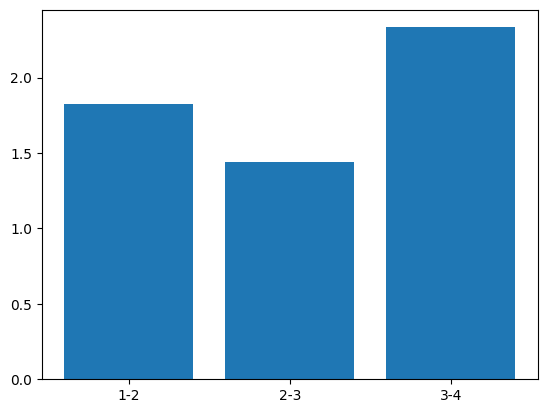

In [23]:
temp_mrgns = [(1, 2), (2, 3), (3, 4)]
temp_names = []
datas = []

for i in temp_mrgns:
    temp_names.append(str(i[0])+"-"+str(i[1]))
    curr_imp = not_pros[(not_pros.diff_park >= i[0]) & (not_pros.diff_park < i[1]) & \
        (not_pros.linreg > 0)]
    curr_nimp = not_pros[(not_pros.diff_park >= i[0]) & (not_pros.diff_park < i[1]) & \
        (not_pros.linreg < 0)]
    datas.append((len(curr_imp["linreg"])/len(curr_nimp["linreg"])))
    print(len(curr_imp["linreg"])+len(curr_nimp["linreg"]))
bp = plt.pyplot.bar(temp_names, datas)

75.9 1-2
69.25 2-3
71.2 3-4
{'Профессионалы': [1.826086956521739, 1.4375, 2.3333333333333335], 'Любители': [1.1256038647342994, 1.161764705882353, 1.2272727272727273]} ['1-2', '2-3', '3-4']


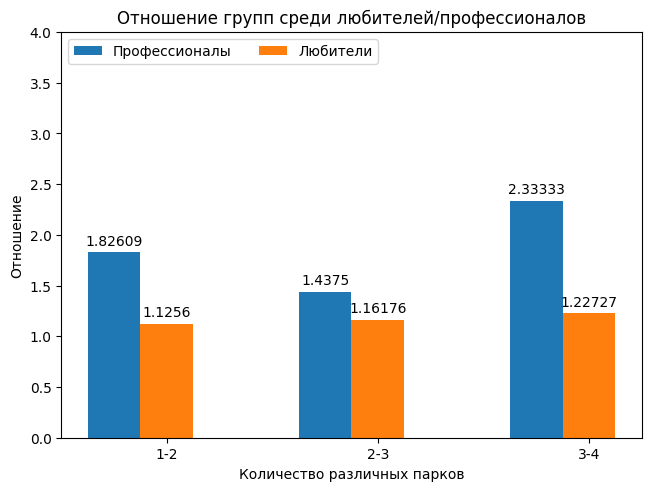

In [107]:
temp_mrgns = [(1, 2), (2, 3), (3, 4)]
temp_names = []
datas = {"Профессионалы": [], "Любители": []}

for i in temp_mrgns:
    temp_names.append(str(i[0])+"-"+str(i[1]))
    curr_imp = not_pros[(not_pros.diff_park >= i[0]) & (not_pros.diff_park < i[1]) & \
        (not_pros.linreg > 0)]
    curr_nimp = not_pros[(not_pros.diff_park >= i[0]) & (not_pros.diff_park < i[1]) & \
        (not_pros.linreg < 0)]
    curr_imp_p = pros[(pros.diff_park >= i[0]) & (pros.diff_park < i[1]) & \
        (pros.linreg > 0)]
    curr_nimp_p = pros[(pros.diff_park >= i[0]) & (pros.diff_park < i[1]) & \
        (pros.linreg < 0)]
    
    print(curr_imp["humidity"].median(), temp_names[-1])
    datas["Профессионалы"].append((len(curr_imp["linreg"])/len(curr_nimp["linreg"])))
    datas["Любители"].append((len(curr_imp_p["linreg"])/len(curr_nimp_p["linreg"])))
print(datas, temp_names)
plot_mult_gr(datas, temp_names, 4, "Количество различных парков", "Отношение", "Отношение групп среди любителей/профессионалов")
plt.pyplot.show()

151
165
198


Text(0.5, 0, 'Возраст(лет)')

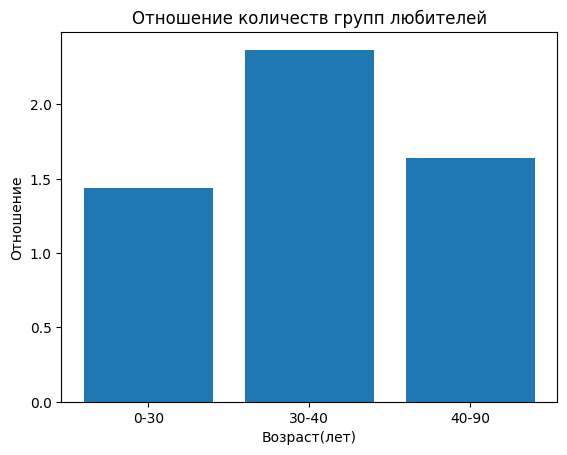

In [83]:
temp_mrgns = [(0, 30), (30, 40), (40, 90)]
temp_names = []
datas = []

for i in temp_mrgns:
    temp_names.append(str(i[0])+"-"+str(i[1]))
    curr_imp = not_pros[(not_pros.age >= i[0]) & (not_pros.age < i[1]) & \
        (not_pros.linreg > 0)]
    curr_nimp = not_pros[(not_pros.age >= i[0]) & (not_pros.age < i[1]) & \
        (not_pros.linreg < 0)]
    datas.append((len(curr_imp["linreg"])/len(curr_nimp["linreg"])))
    print(len(curr_imp["linreg"])+len(curr_nimp["linreg"]))
bp = plt.pyplot.bar(temp_names, datas)
plt.pyplot.title("Отношение количеств групп любителей")
plt.pyplot.ylabel("Отношение")
plt.pyplot.xlabel("Возраст(лет)")

75.25 0-30
74.56684491978609 30-40
76.8 40-90
{'Профессионалы': [1.435483870967742, 2.36734693877551, 1.64], 'Любители': [1.287037037037037, 1.2582159624413145, 0.883495145631068]} ['0-30', '30-40', '40-90']


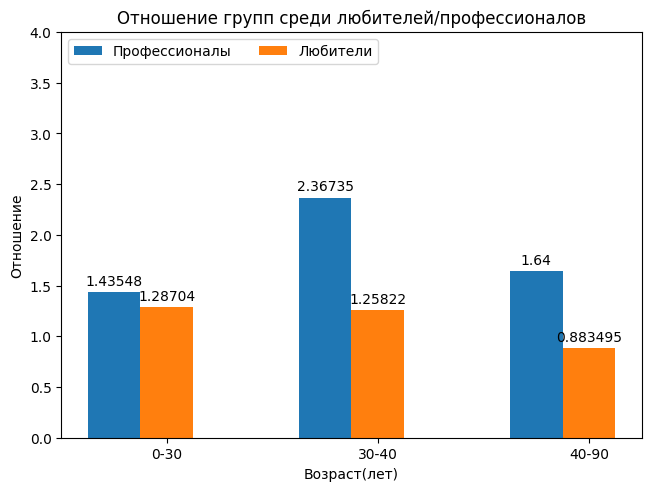

In [108]:
temp_mrgns = [(0, 30), (30, 40), (40, 90)]

temp_names = []
datas = {"Профессионалы": [], "Любители": []}

for i in temp_mrgns:
    temp_names.append(str(i[0])+"-"+str(i[1]))
    curr_imp = not_pros[(not_pros.age >= i[0]) & (not_pros.age < i[1]) & \
        (not_pros.linreg > 0)]
    curr_nimp = not_pros[(not_pros.age >= i[0]) & (not_pros.age < i[1]) & \
        (not_pros.linreg < 0)]
    curr_imp_p = pros[(pros.age >= i[0]) & (pros.age < i[1]) & \
        (pros.linreg > 0)]
    curr_nimp_p = pros[(pros.age >= i[0]) & (pros.age < i[1]) & \
        (pros.linreg < 0)]
    
    print(curr_imp["humidity"].median(), temp_names[-1])
    datas["Профессионалы"].append((len(curr_imp["linreg"])/len(curr_nimp["linreg"])))
    datas["Любители"].append((len(curr_imp_p["linreg"])/len(curr_nimp_p["linreg"])))
print(datas, temp_names)
plot_mult_gr(datas, temp_names, 4, "Возраст(лет)", "Отношение", "Отношение групп среди любителей/профессионалов")
plt.pyplot.show()

In [50]:
pros.corr()

,athlete_id,std_dev,time,age,gender,n_runn_avg,diff_surf,diff_park,feels_like_c,ws_avg,pressure,humidity,dew_point,linreg
athlete_id,1.000000,0.007969,0.138660,-0.114799,0.018751,0.047017,-0.165704,-0.145160,-0.089361,-0.082033,-0.047840,0.170197,-0.054996,-0.075764
std_dev,0.007969,1.000000,0.074624,-0.087472,0.100318,-0.029068,0.031478,0.042391,-0.067957,-0.024995,0.004316,0.056682,-0.060108,-0.165998
time,0.138660,0.074624,1.000000,0.012248,0.380941,0.027174,-0.056072,-0.063179,-0.022168,0.010405,0.011231,-0.025396,-0.034339,0.046316
age,-0.114799,-0.087472,0.012248,1.000000,-0.008131,-0.034688,0.046349,0.031501,-0.154774,0.038896,-0.048385,0.103183,-0.148895,-0.048875
gender,0.018751,0.100318,0.380941,-0.008131,1.000000,0.002600,0.007195,0.003382,0.004134,0.020702,0.018604,-0.013063,0.001926,-0.049973
n_runn_avg,0.047017,-0.029068,0.027174,-0.034688,0.002600,1.000000,-0.080404,-0.072292,0.128017,0.110245,0.008114,-0.143179,0.101913,0.123658
diff_surf,-0.165704,0.031478,-0.056072,0.046349,0.007195,-0.080404,1.000000,0.893974,0.019502,0.054735,0.017836,0.002535,0.025023,-0.002353
diff_park,-0.145160,0.042391,-0.063179,0.031501,0.003382,-0.072292,0.893974,1.000000,-0.004333,0.038518,0.005099,0.030779,0.005637,-0.029582
feels_like_c,-0.089361,-0.067957,-0.022168,-0.154774,0.004134,0.128017,0.019502,-0.004333,1.000000,-0.115382,0.113362,-0.612860,0.962067,0.164543
ws_avg,-0.082033,-0.024995,0.010405,0.038896,0.020702,0.110245,0.054735,0.038518,-0.115382,1.000000,-0.155751,-0.029852,-0.107144,0.030002


In [43]:
len(pros[(pros.age >= 20) & (pros.age < 90)]["linreg"])

991

In [51]:
not_pros.corr()

,athlete_id,std_dev,time,age,gender,n_runn_avg,diff_surf,diff_park,feels_like_c,ws_avg,pressure,humidity,dew_point,linreg
athlete_id,1.000000,0.025445,0.106959,-0.019529,0.103473,0.055444,-0.230446,-0.242711,-0.189999,-0.064836,-0.159427,0.348535,-0.108175,0.035506
std_dev,0.025445,1.000000,0.164949,-0.060718,-0.084603,-0.064431,-0.023868,0.002463,-0.116510,0.012253,-0.102092,0.096543,-0.107578,-0.035811
time,0.106959,0.164949,1.000000,0.051890,0.066750,-0.027937,-0.060913,-0.073956,-0.103783,-0.014646,-0.052108,0.056689,-0.105142,0.000372
age,-0.019529,-0.060718,0.051890,1.000000,0.105004,-0.013757,0.010981,0.010566,-0.114953,-0.010186,-0.026812,0.100683,-0.102020,0.049359
gender,0.103473,-0.084603,0.066750,0.105004,1.000000,-0.037617,0.034184,0.018411,0.054624,-0.057459,-0.028349,0.022709,0.069931,-0.033162
n_runn_avg,0.055444,-0.064431,-0.027937,-0.013757,-0.037617,1.000000,-0.020002,-0.021143,0.046003,0.100894,-0.037805,-0.012922,0.051206,0.055309
diff_surf,-0.230446,-0.023868,-0.060913,0.010981,0.034184,-0.020002,1.000000,0.910968,0.034418,0.045683,0.013707,-0.021212,0.036118,-0.046520
diff_park,-0.242711,0.002463,-0.073956,0.010566,0.018411,-0.021143,0.910968,1.000000,0.033908,0.044970,0.032657,-0.031035,0.032432,-0.054342
feels_like_c,-0.189999,-0.116510,-0.103783,-0.114953,0.054624,0.046003,0.034418,0.033908,1.000000,-0.215309,0.099081,-0.566329,0.963295,0.162846
ws_avg,-0.064836,0.012253,-0.014646,-0.010186,-0.057459,0.100894,0.045683,0.044970,-0.215309,1.000000,-0.122520,0.018617,-0.206663,0.019133


In [53]:
from scipy.stats import pearsonr

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return pvalues

calculate_pvalues(not_pros)

,athlete_id,std_dev,time,age,gender,n_runn_avg,diff_surf,diff_park,feels_like_c,ws_avg,pressure,humidity,dew_point,linreg
athlete_id,0.0,0.5649,0.0153,0.6587,0.019,0.2095,0.0,0.0,0.0,0.1421,0.0003,0.0,0.0141,0.4218
std_dev,0.5649,0.0,0.0002,0.1693,0.0553,0.1446,0.5893,0.9556,0.0082,0.7817,0.0206,0.0286,0.0147,0.4178
time,0.0153,0.0002,0.0,0.2403,0.1307,0.5274,0.1679,0.094,0.0186,0.7404,0.2383,0.1994,0.0171,0.9933
age,0.6587,0.1693,0.2403,0.0,0.0172,0.7557,0.8039,0.8111,0.0091,0.8178,0.5442,0.0224,0.0207,0.264
gender,0.019,0.0553,0.1307,0.0172,0.0,0.3947,0.4393,0.6771,0.2163,0.1934,0.5213,0.6075,0.1133,0.4531
n_runn_avg,0.2095,0.1446,0.5274,0.7557,0.3947,0.0,0.651,0.6325,0.2979,0.0222,0.3924,0.7701,0.2465,0.2106
diff_surf,0.0,0.5893,0.1679,0.8039,0.4393,0.651,0.0,0.0,0.4362,0.3013,0.7565,0.6314,0.4139,0.2925
diff_park,0.0,0.9556,0.094,0.8111,0.6771,0.6325,0.0,0.0,0.443,0.3089,0.46,0.4826,0.4631,0.2187
feels_like_c,0.0,0.0082,0.0186,0.0091,0.2163,0.2979,0.4362,0.443,0.0,0.0,0.0247,0.0,0.0,0.0002
ws_avg,0.1421,0.7817,0.7404,0.8178,0.1934,0.0222,0.3013,0.3089,0.0,0.0,0.0054,0.6737,0.0,0.6652


In [54]:
calculate_pvalues(pros)

,athlete_id,std_dev,time,age,gender,n_runn_avg,diff_surf,diff_park,feels_like_c,ws_avg,pressure,humidity,dew_point,linreg
athlete_id,0.0,0.7903,0.0,0.0001,0.5315,0.1165,0.0,0.0,0.0028,0.0061,0.1102,0.0,0.0663,0.0113
std_dev,0.7903,0.0,0.0126,0.0035,0.0008,0.332,0.2934,0.157,0.0232,0.4042,0.8855,0.0584,0.0447,0.0
time,0.0,0.0126,0.0,0.6828,0.0,0.3644,0.0611,0.0348,0.4594,0.7284,0.7078,0.3967,0.2517,0.122
age,0.0001,0.0035,0.6828,0.0,0.7861,0.2469,0.1218,0.2931,0.0,0.1941,0.1062,0.0006,0.0,0.1027
gender,0.5315,0.0008,0.0,0.7861,0.0,0.9309,0.8103,0.9102,0.8903,0.4896,0.5347,0.6629,0.9487,0.0952
n_runn_avg,0.1165,0.332,0.3644,0.2469,0.9309,0.0,0.0072,0.0157,0.0,0.0002,0.7866,0.0,0.0007,0.0
diff_surf,0.0,0.2934,0.0611,0.1218,0.8103,0.0072,0.0,0.0,0.5151,0.0676,0.5517,0.9326,0.4036,0.9374
diff_park,0.0,0.157,0.0348,0.2931,0.9102,0.0157,0.0,0.0,0.885,0.1985,0.8649,0.3043,0.8508,0.3235
feels_like_c,0.0028,0.0232,0.4594,0.0,0.8903,0.0,0.5151,0.885,0.0,0.0001,0.0001,0.0,0.0,0.0
ws_avg,0.0061,0.4042,0.7284,0.1941,0.4896,0.0002,0.0676,0.1985,0.0001,0.0,0.0,0.3191,0.0003,0.3166


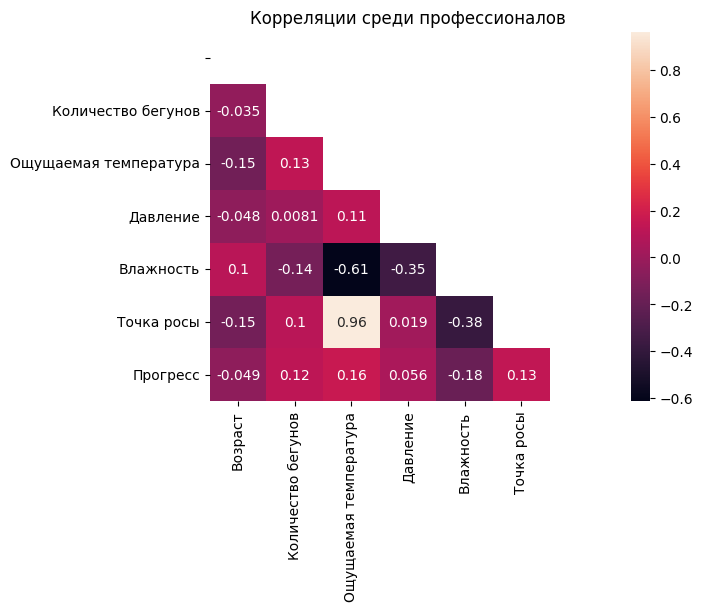

In [75]:
important_pros = pros[["age", "n_runn_avg", "feels_like_c", "pressure", "humidity", "dew_point", "linreg"]]
important_not_pros = not_pros[["age", "n_runn_avg", "feels_like_c", "pressure", "humidity", "dew_point", "linreg"]]

def draw_tri(corr, title, x_labels=[], y_labels=[]):
    matrix = np.triu(corr)

    # using the upper triangle matrix as mask 
    hmp = sns.heatmap(corr, annot=True, mask=matrix, xticklabels=x_labels, yticklabels=y_labels)
    hmp.set_title(title)

x_lbl = ["Возраст", "Количество бегунов", "Ощущаемая температура", "Давление", "Влажность", "Точка росы"]
y_lbl = ["", "Количество бегунов", "Ощущаемая температура", "Давление", "Влажность", "Точка росы", "Прогресс"]
draw_tri(important_pros.corr(), "Корреляции среди профессионалов", x_lbl, y_lbl)

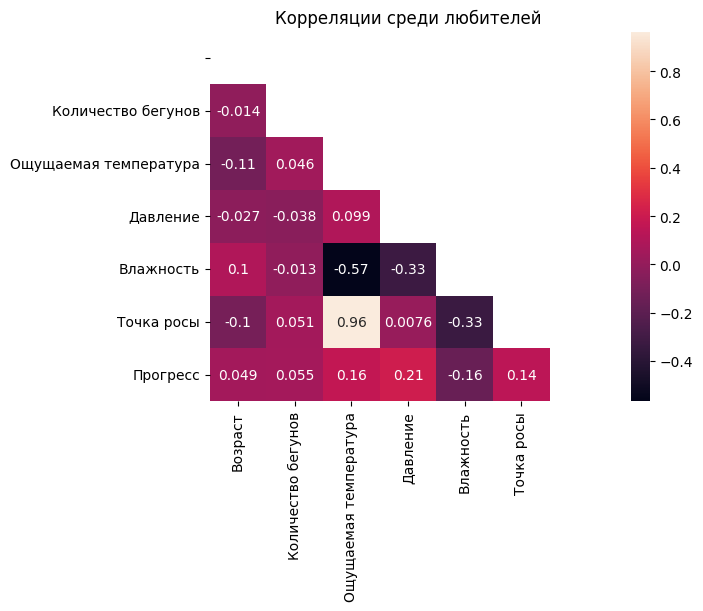

In [76]:
draw_tri(important_not_pros.corr(), "Корреляции среди любителей", x_lbl, y_lbl)